In [1]:
import numpy as np
import cv2
import os
from collections import Counter
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
def RGB2LMS(RGB):
    RGB2LMSMatrix = np.array([[0.3811, 0.5783, 0.0402], [0.1967, 0.7244, 0.0782], [0.0241, 0.1288, 0.8444]]).astype('float32')
    L = (RGB2LMSMatrix[0]*RGB).sum(2)
    M = (RGB2LMSMatrix[1]*RGB).sum(2)
    S = (RGB2LMSMatrix[2]*RGB).sum(2)
    LMS = cv2.merge([L, M, S])
    LMS[np.where(LMS == 0)] = 1
    return LMS

def LMS2lab(LMS):
    a = [[1/np.sqrt(3), 0, 0], [0, 1/np.sqrt(6), 0], [0, 0, 1/np.sqrt(2)]]
    b = [[1, 1, 1], [1, 1, -2], [1, -1, 0]]
    c = np.matmul(a, b)
    ll = (c[0]*LMS).sum(2)
    aa = (c[1]*LMS).sum(2)
    bb = (c[2]*LMS).sum(2)
    lab = cv2.merge([ll, aa, bb])
    return lab

def lab2LMS(lab):
    a = [[1, 1, 1], [1, 1, -1], [1, -2, 0]]
    b = [[1/np.sqrt(3), 0, 0], [0, 1/np.sqrt(6), 0], [0, 0, 1/np.sqrt(2)]]
    c = np.matmul(a, b)
    L = (c[0]*lab).sum(2)
    M = (c[1]*lab).sum(2)
    S = (c[2]*lab).sum(2)
    LMS = cv2.merge([L, M, S])
    return LMS

def LMS2RGB(LMS):
    LMS2RGBMatrix = np.array([[4.4679, -3.5873, 0.1193], [-1.2186, 2.3809, -0.1624], [0.0497, -0.2439, 1.2045]]).astype('float32')
    R = (LMS2RGBMatrix[0]*LMS).sum(2)
    G = (LMS2RGBMatrix[1]*LMS).sum(2)
    B = (LMS2RGBMatrix[2]*LMS).sum(2)
    RGB = cv2.merge([R, G, B])
    RGB = np.clip(RGB, 0, 1)    
    return RGB

def RGB2lab(RGB):
    LMS = RGB2LMS(RGB)
    LMS = np.log10(LMS)
    lab = LMS2lab(LMS)
    return lab

def lab2RGB(lab):
    LMS = lab2LMS(lab)
    LMS = np.power(10, LMS)
    RGB = LMS2RGB(LMS)
    return RGB
    
def transfer(src, tar):
    srcMean = np.mean(src, axis=(0, 1))
    srcStd = np.std(src, axis=(0, 1))
    tarMean = np.mean(tar, axis=(0, 1))
    tarStd = np.std(tar, axis=(0, 1))

    res = src - srcMean
    res /= srcStd
    res *= tarStd
    res += tarMean
    return res

def end2endTranser(f1, f2):
    if(f1.max() > 1):
        f1 = f1 / 255
    if(f2.max() > 1):
        f2 = f2 / 255
    
    f2 = cv2.resize(f2, (f1.shape[1], f1.shape[0]))
    
    a = f1[:, :, :3]
    b = f2[:, :, :3]
    
    srclab = RGB2lab(a)
    tarlab = RGB2lab(b)

    reslab = transfer(srclab, tarlab)

    resRGB = lab2RGB(reslab)
    if(f1.shape[2] == 4):
        resRGB = np.concatenate([resRGB, f1[:, :, 3][:, :, np.newaxis]], 2)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(f1)
    plt.title('src')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(f2)
    plt.title('style')
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(resRGB)
    plt.title('result')
    plt.axis('off')
    plt.subplots_adjust(top=None, bottom=None, left=None, right=None, wspace=0.01, hspace=0)
    plt.show()
    return resRGB

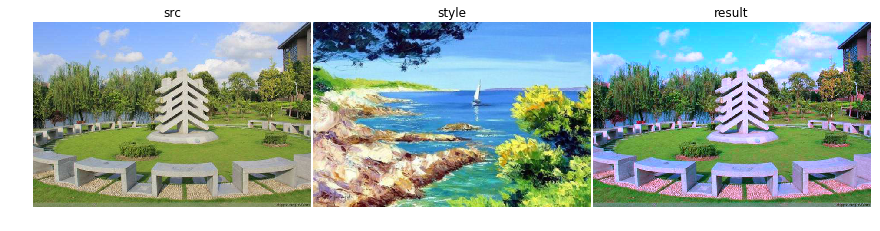

In [8]:
f1 = plt.imread('img/ecnu.jpg')
f2 = plt.imread('img/paint.jpg')
result = end2endTranser(f1, f2)

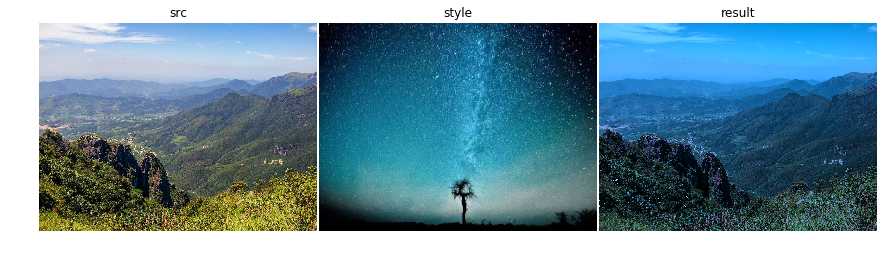

In [5]:
f1 = plt.imread('img/mountain.jpg')
f2 = plt.imread('img/star2.jpg')
result = end2endTranser(f1, f2)